<div align="center">

## Proyecto Modulo 1.- El **TITANIC** *Procesamiento de datos*

<div>

##### Importamos librerias necesarias

In [65]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from IPython.display import Image, display, HTML
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')

In [66]:
# leemos csv
pd.read_csv('')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##### Creamos 2 df para tratar los datos nulos bajo dos posibilidades diferentes y analizaremos cual es la mas efectiva para trabajar sobre ellos.

In [67]:
df_media = pd.read_csv('C')
df_Knn = pd.read_csv('')

##### Empezaremos a trabajar sobre 'df_media'

In [68]:
df_media.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df_media.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [70]:
# eliminamos posibles datos duplicados
df_media.drop_duplicates(inplace=True)

In [71]:
# visualizamos las columnas con datos nulos
df_media.isnull().sum() / df_media.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

##### Preprocesamiento sobre la columna 'Age' contiene un 19.8% de valores nulos, en este caso vamos a completar con la media del resto del conjunto de datos.

In [72]:
mean_age = df_media['Age'].mean()
mean_age
df_media['Age'].fillna(mean_age, inplace=True)
print(df_media['Age'].isnull().sum)

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool>


##### Visualizamos el gráfico de distribución de la edad después de rellenar los valores nulos con la media.

Text(0, 0.5, 'Frecuencia')

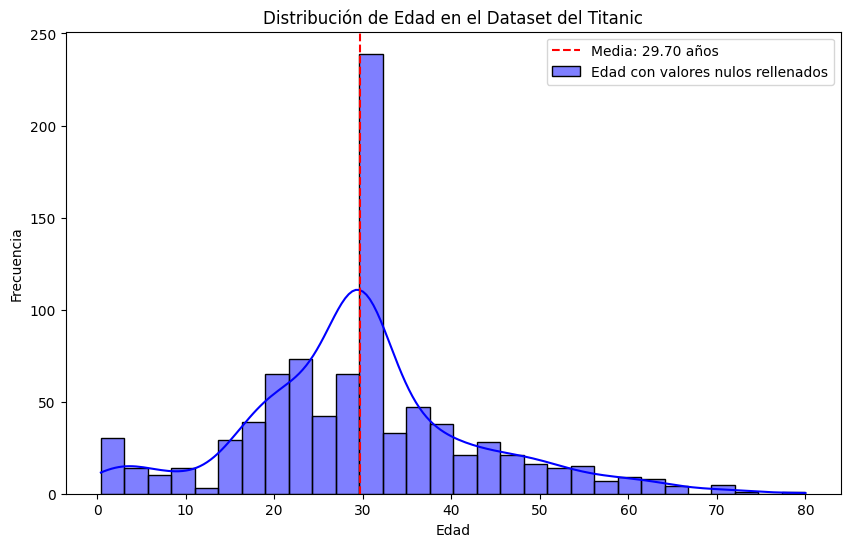

In [73]:
plt.figure(figsize=(10, 6))

# Gráfico de distribución de la edad después de rellenar valores nulos
sns.histplot(df_media['Age'], kde=True, color='blue', label='Edad con valores nulos rellenados')

# Añadir la línea de la media
plt.axvline(mean_age, color='red', linestyle='--', label=f'Media: {mean_age:.2f} años')

# Añadir leyenda y título
plt.legend()
plt.title('Distribución de Edad en el Dataset del Titanic')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

## Relleno de Valores Nulos

### Método Aplicado
Rellenamos los valores nulos de la columna `Age` con la media de 29.70 años.

### Resultado
Generamos una visualización usando `sns.histplot` para mostrar la distribución de las edades después de esta imputación.

### Observaciones
Rellenar los datos nulos con la media resultó en una sobresaturación de la edad media (29.70 años), lo que no es representativo de una población diversa. Este método es sencillo pero no captura la variabilidad de los datos reales.

### Propuesta de Mejora
Para obtener estimaciones más precisas de las edades faltantes, proponemos el desarrollo de un modelo K-Nearest Neighbors (KNN). Este enfoque utilizará las características disponibles en el conjunto de datos para predecir la edad de manera más cercana a los valores reales, manteniendo la integridad estadística y mejorando la precisión del análisis.

## Próximos Pasos
1. **Desarrollo del Modelo KNN:** Entrenar y validar el modelo utilizando datos completos.
2. **Evaluación de Resultados:** Comparar la precisión del modelo KNN frente al método de imputación por media.
3. **Implementación:** Aplicar el modelo KNN al conjunto de datos y analizar los resultados.
   

In [74]:
df_Knn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
# eliminamos duplicados 
df_Knn.drop_duplicates(inplace=True)

In [76]:
df_Knn.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
# Vamos a normalizar Fare para asegurarnos que no tenga un impacto desproporcionado en la distancia 
scaler = StandardScaler()
df_Knn['Fare'] = scaler.fit_transform(df_Knn[['Fare']])

In [78]:
# estas son las columnas que elegimos como predictores de nuestro modelo.

columnas=['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked',"Age"] #la edad tiene que tenerse en cuenta al predecir, los apellidos es una variable muy random y ruidosa para introducirse

# Aplicamos OneHotEncoder para codificar nuestras variables categóricas 
encoder = OneHotEncoder(drop='first', sparse_output=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df_Knn[columnas]))
df_encoded.columns = encoder.get_feature_names_out(columnas)

In [79]:
# Creamos dos dataframes basados en la presencia de Age
df_encoded['Age'] = df_Knn['Age']
df_with_age = df_encoded.dropna(subset=['Age'])
df_without_age = df_encoded[df_encoded['Age'].isna()].drop(columns='Age')

In [80]:
# Dividimos el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(df_with_age.drop(columns='Age'), df_with_age['Age'], test_size=0.2, random_state=357)

scores = [219.08405565 122.88157895 223.62027544 135.65153772 167.68399386]
scores = [136.52994217  82.51329496 155.70730219 105.13201404 123.60082807]
scores = [130.4628458   60.18006121 135.48813665 108.51132836 116.9991268 ]
scores = [117.66245815  67.15095137 127.62349945 110.55036469 131.51371228]
scores = [125.76203809  68.63970772 127.35082789 125.38223218 134.64002067]
scores = [127.75953862  76.2862182  126.66201508 128.28372641 138.96856813]


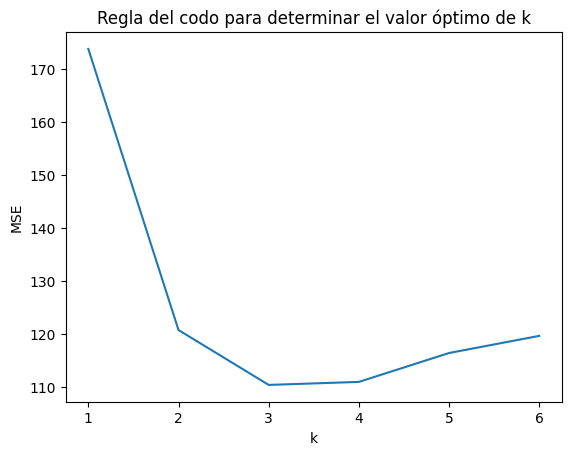

In [81]:
# Lista para almacenar los valores de MSE (Error Cuadrático Medio)
mse = []

# Rango de k para probar
k_range = range(1, 7)

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Realizamos la validación cruzada para obtener una medida más robusta del error
    """  estamos tomando el negativo de los valores devueltos para obtener el MSE real. 
         Luego, añadimos la media de estos valores a nuestra lista de MSE para cada valor de k (mse.append(scores.mean())).
    """
    scores = -cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse.append(scores.mean())
    print(f'scores = {scores}')
    
 
# Graficamos los valores 
plt.plot(k_range, mse)
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('Regla del codo para determinar el valor óptimo de k')
plt.show()


In [82]:
# Determinar el mejor valor de k
best_k = k_range[mse.index(min(mse))]
print(f'Mejor número K: {best_k}')

Mejor número K: 3


In [83]:
# Creamos el modelo KNN con el mejor valor de k
knn = KNeighborsRegressor(n_neighbors=best_k)

# Ajustamos el modelo a los datos sin valores nulos
knn.fit(X_train, y_train)

# Imputamos los valores faltantes en la columna 'Age'
imputed_ages = knn.predict(df_without_age)
df_Knn.loc[df_Knn['Age'].isna(), 'Age'] = imputed_ages

Text(0, 0.5, 'Frecuencia')

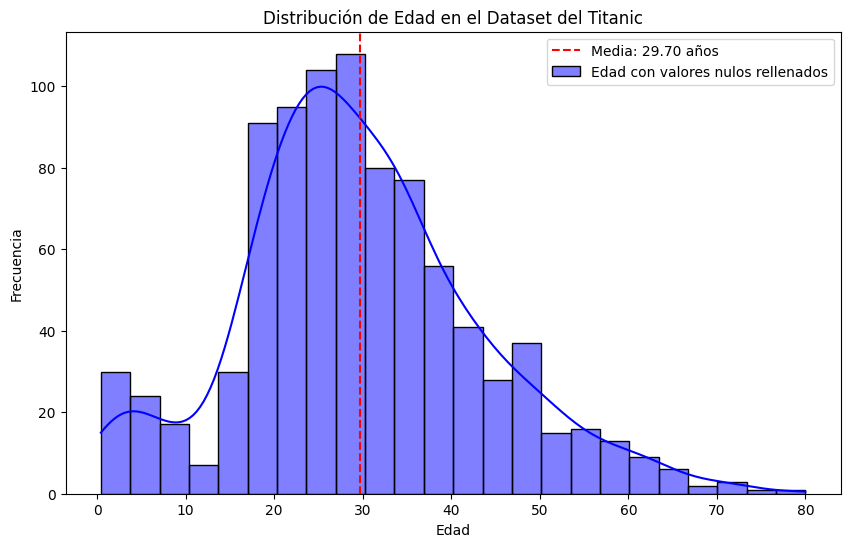

In [84]:
plt.figure(figsize=(10, 6))

# Gráfico de distribución de la edad después de rellenar valores nulos
sns.histplot(df_Knn['Age'], kde=True, color='blue', label='Edad con valores nulos rellenados')

# Añadir la línea de la media
plt.axvline(mean_age, color='red', linestyle='--', label=f'Media: {mean_age:.2f} años')

# Añadir leyenda y títulos
plt.legend()
plt.title('Distribución de Edad en el Dataset del Titanic')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

#### **Conclusión**

##### A través de la implementación del modelo KNN, esperamos mejorar significativamente la precisión de nuestras imputaciones de edad, reflejando mejor la diversidad demográfica del Titanic. Este cambio no solo mejora la calidad del análisis, sino que también proporciona una base más sólida para futuros estudios y modelos predictivos.

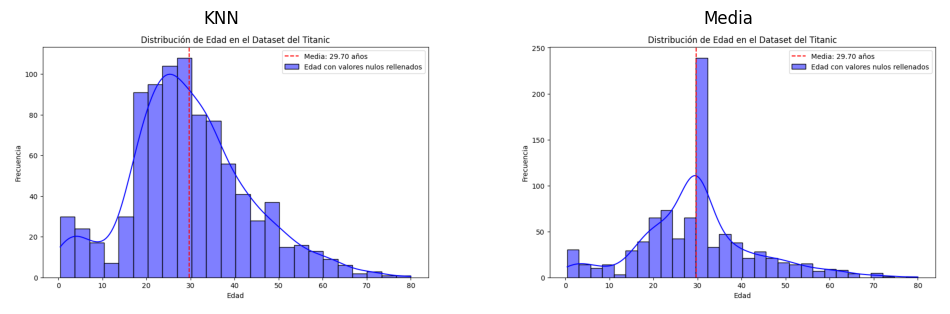

In [85]:


# Cargar las imágenes
img1 = mpimg.imread('')
img2 = mpimg.imread('')

# Crear una figura y ejes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Mostrar la primera imagen
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title('KNN')

# Mostrar la segunda imagen
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title('Media')

# Mostrar el gráfico
plt.show()


##### Reparación de valores nulos de la columna 'Embarked' a través de la implementación de modelo KNN.

In [86]:

# Seleccionar las columnas relevantes
columns = ['Embarked', 'Pclass', 'Age', 'Fare']
df_selected = df_Knn[columns]

# Convertir los valores categóricos a numéricos
df_selected['Embarked'] = df_selected['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Crear el imputador KNN
imputer = KNNImputer(n_neighbors=5)

# Imputar los valores nulos
df_selected = pd.DataFrame(imputer.fit_transform(df_selected), columns=columns)

# Convertir los valores numéricos de 'Embarked' de vuelta a categóricos
df_selected['Embarked'] = df_selected['Embarked'].round().map({0: 'C', 1: 'Q', 2: 'S'})

# Reemplazar la columna original en el DataFrame
df_Knn['Embarked'] = df_selected['Embarked']

# Verificar los cambios
print(df_Knn['Embarked'].isnull().sum())


0


Text(0, 0.5, 'Frecuencia')

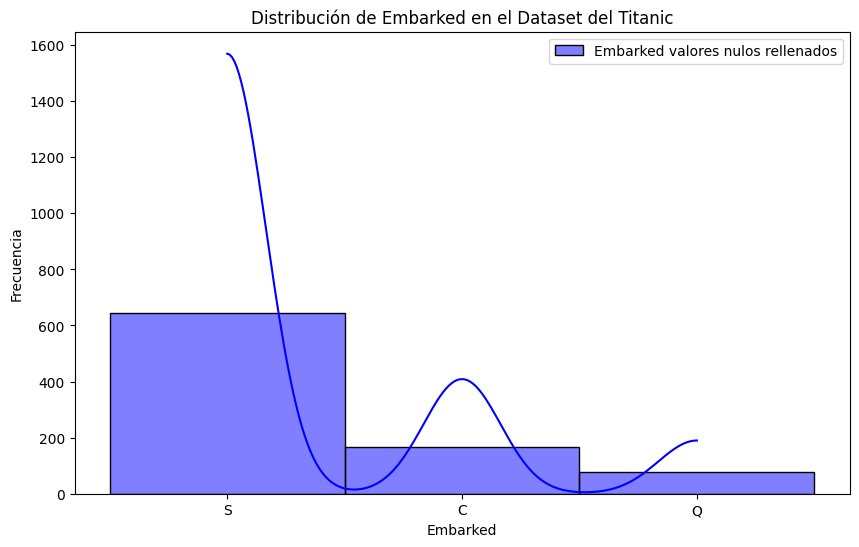

In [87]:
plt.figure(figsize=(10, 6))

# Gráfico de distribución de la edad después de rellenar valores nulos
sns.histplot(df_Knn['Embarked'], kde=True, color='blue', label='Embarked valores nulos rellenados')



# Añadir leyenda y títulos
plt.legend()
plt.title('Distribución de Embarked en el Dataset del Titanic')
plt.xlabel('Embarked')
plt.ylabel('Frecuencia')

In [88]:
df_Knn.isnull().sum() / df_media.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.000000
dtype: float64

##### Desechamos la columna Cabin ya que tiene un 70% de datos nulos y carece de sentido repararla

In [89]:
df_Knn.drop(columns=['Cabin'], inplace=True)

In [90]:
df_Knn.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

##### Desechamos tambien la columna 'PassengerId'

In [91]:
df_Knn.drop(columns=['PassengerId'], inplace=True)

In [92]:
df_Knn.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

##### Vamos a crear una columna nueva con el nombre 'LastName' en la que sacaremos el apellido de los viajeros.

In [93]:
df_Knn['LastName'] = df_Knn['Name'].apply(lambda x: x.split(',')[0])

In [94]:
df_Knn.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,-0.502445,S,Braund
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,C,Cumings
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.488854,S,Heikkinen
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.420730,S,Futrelle
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,-0.486337,S,Allen


##### Normalizamos la columna 'Ticket'.

In [95]:
label_encoder = LabelEncoder()

# Codificar la columna 'Ticket'
df_Knn['Ticket'] = label_encoder.fit_transform(df_Knn['Ticket'])
df_Knn.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,523,-0.502445,S,Braund
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,596,0.786845,C,Cumings
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,669,-0.488854,S,Heikkinen
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,49,0.420730,S,Futrelle
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,472,-0.486337,S,Allen


##### Cambiamos la columna 'Survived' a booleano

In [96]:
# Cambiar la columna 'Survived' a booleana
df_Knn['Survived'] = df_Knn['Survived'].astype(bool)
df_Knn.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName
0,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,523,-0.502445,S,Braund
1,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,596,0.786845,C,Cumings
2,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,669,-0.488854,S,Heikkinen
3,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,49,0.420730,S,Futrelle
4,False,3,"Allen, Mr. William Henry",male,35.0,0,0,472,-0.486337,S,Allen


##### Reparamos la columna AGE para verla solo con dos cifras

In [97]:
# Mantener solo las dos primeras cifras de la columna 'Age'
def truncate_age(age):
    if pd.notnull(age):
        age_str = str(age).split('.')[0]  # Quitar la parte decimal si existe
        return int(age_str[:2])
    return age

df_Knn['Age'] = df_Knn['Age'].apply(truncate_age)
df_Knn.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName
0,False,3,"Braund, Mr. Owen Harris",male,22,1,0,523,-0.502445,S,Braund
1,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,596,0.786845,C,Cumings
2,True,3,"Heikkinen, Miss. Laina",female,26,0,0,669,-0.488854,S,Heikkinen
3,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,49,0.420730,S,Futrelle
4,False,3,"Allen, Mr. William Henry",male,35,0,0,472,-0.486337,S,Allen


##### Guardar el DataFrame df_Knn como un archivo CSV con el que trabajaremos en el EDA.

In [ ]:
df_Knn.to_csv('', index=False)


## Procesamiento de Datos para el Proyecto Titanic 🚢

### Relleno de Valores Nulos
**Método Aplicado**: Rellenamos los valores nulos de la columna `Age` con la media de 29.70 años.

**Resultado**: Generamos una visualización utilizando `sns.histplot` para mostrar la distribución de las edades después de esta imputación.

**Observaciones**: Rellenar los datos nulos con la media resultó en una sobresaturación de la edad media (29.70 años), lo que no es representativo de una población diversa. Este método es sencillo pero no captura la variabilidad de los datos reales.

### Propuesta de Mejora
Para obtener estimaciones más precisas de las edades faltantes, proponemos el desarrollo de un modelo K-Nearest Neighbors (KNN). Este enfoque utilizará las características disponibles en el conjunto de datos para predecir la edad de manera más cercana a los valores reales, manteniendo la integridad estadística y mejorando la precisión del análisis.

### Implementación del Modelo KNN
1. **Desarrollo del Modelo KNN**: Entrenar y validar el modelo utilizando datos completos.
2. **Evaluación de Resultados**: Comparar la precisión del modelo KNN frente al método de imputación por media.
3. **Implementación**: Aplicar el modelo KNN al conjunto de datos y analizar los resultados.

### Otras reparaciones:
1. Reducir a visualizar con solo  2 cifras
2. Desechamos la columna 'Cabin' ya que contiene 70% de datos nulos
3. Desechamos la columna 'PassengerId' ya que no nos aporta ningun valor al EDA.
4. Creamos columna 'Last Name' para poder relacionar miembros de grupos familiares.
5. Normailizamos la columna 'Ticket' ya que no hemos encotrado nada concluyente acorde a los prefijos de los tickets.

---

